In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm


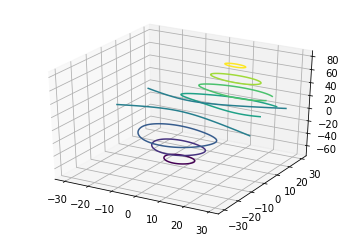

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
X,Y,Z = axes3d.get_test_data(0.05)
cset = ax.contour(X,Y,Z, cmap=cm.viridis)

<IPython.core.display.Javascript object>


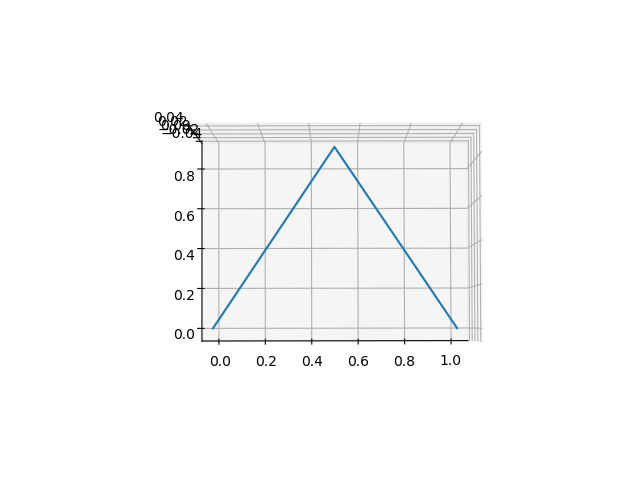

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(xs=[0,0.5,1],ys=[0,3**0.5/2,0],zs=0)

In [46]:
vertices = np.array([[0,0,0],[1,0,0],[1/2,3**0.5/2,0],[1/2,3**0.5/6,6**0.5/3]])
pairs = []
for i, v1 in enumerate(vertices):
    for j, v2 in enumerate(vertices):
        if j > i:
            pairs.append(v1)
            pairs.append(v2)
pairs = np.asarray(pairs)

(6, 2, 3)

<IPython.core.display.Javascript object>


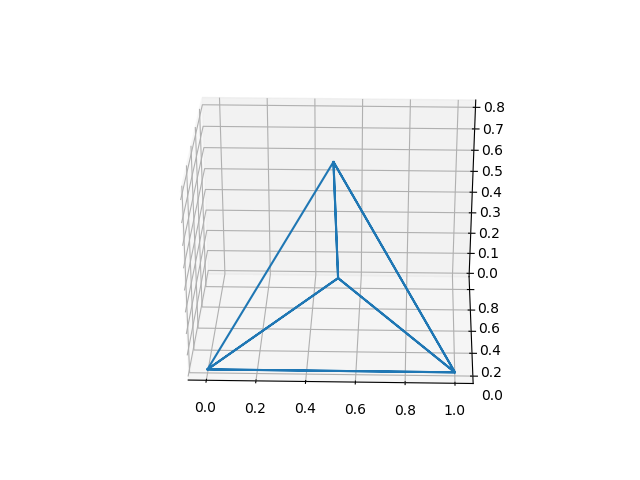

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(xs=pairs[:,0],ys=pairs[:,1],zs=pairs[:,2])

In [21]:
def get_vertex_pairs(vertices):
    pairs = []
    for i, v1 in enumerate(vertices):
        for j, v2 in enumerate(vertices):
            if j > i:
                pairs.append(v1)
                pairs.append(v2)
    pairs = np.asarray(pairs)
    return pairs

def plot_outline(vertices,ax=None,**kwargs):
    dim = vertices.shape[1]
    pairs = get_vertex_pairs(vertices)
    if ax==None:
        fig = plt.figure()
        if dim==2:
            ax = fig.add_subplot(111)
            p = ax.plot(pairs[:,0],pairs[:,1],**kwargs)
        if dim==3:
            ax = fig.add_subplot(111,projection='3d')
            p = ax.plot(xs=pairs[:,0],ys=pairs[:,1],zs=pairs[:,2],**kwargs)
    else:
        if dim==2:
            p = ax.plot(pairs[:,0],pairs[:,1],**kwargs)
        if dim==3:
            p = ax.plot(xs=pairs[:,0],ys=pairs[:,1],zs=pairs[:,2],**kwargs)
    return p

# def norm_frac(xa,xb,xc,xd=None,scale=1):
#     if xd==None:
#         tot = xa + xb + xc
#         factor = scale/tot
#         return xa*factor, xb*factor, xc*factor
#     else:
#         tot = xa + xb + xc + xd
#         factor = scale/tot
#         return xa*factor, xb*factor, xc*factor, xd*factor

def make_tern_axes(ax=None,scale=1,**kwargs):
    if ax==None:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    vertices = np.array([[0,0],[1/2,3**0.5/2],[1,0]])#*scale
    plot_outline(vertices,ax=ax,**kwargs)
    return ax

# def ternary_coords(xa,xb,xc=None,scale=1):
#     if xc is not None:
#         xa, xb, xc = norm_frac(xa,xb,xc,scale=scale)
#     u = 2*xa + xb - 1
#     v = 2*xb + xa - 1
#     return u,v   

def tern_coords(points,normalize=True):
    "Convert atomic fractions to ternary coordinates (2D hexagonal Miller indices)."
    if normalize==True:
        #normalize all points to 1 (independent of scale since cartesian space is not scaled)
        ptsum = np.sum(points,axis=1)
        points = points/ptsum[:,None]

    xa = points[:,0]
    xb = points[:,1]
    xc = points[:,2]
    u = 2*xa + xb - 1
    v = 2*xb + xa - 1
    
    #when only c frac is nonzero, u=v. Need to use xc to set u and v to allow for placing C corner label outside triangle
    #otherwise, formulas above ignore xc and will always place point at C corner
    
    #update: don't need to do this - simply ensure that all fracs sum to 1
    #i.e. if xa = 1.1, then xb=xc=-0.05
    
#     c_only = np.argwhere((points[:,0]==0) & (points[:,1]==0))
#     for i in c_only:
#         u[i] = -(3/2)*xc[i] + 1/2
#         v[i] = -(3/2)*xc[i] + 1/2
    
    return np.column_stack((u,v))

def tern_to_cart(points):
    "Convert ternary coordinates to Cartesion coordinates."
    u = points[:,0]
    v = points[:,1]
    origin = (1/2,3**0.5/6)
    dx = -u/2 + v/2 #u/2
    dy = -(3**0.5/6)*u - (3**0.5/6)*v #-(3**0.5/6)*u + (3**0.5/3)*v
    x = origin[0] + dx
    y = origin[1] + dy
    return np.column_stack((x,y))

def frac_to_cart(points,normalize=True):
    """Convert atomic fractions directly to Cartesian coordinates. 
    First coordinate corresponds to left corner, second to right, third to top."""
    tp = tern_coords(points,normalize=normalize)
    cp = tern_to_cart(tp)
    return cp

#using Miller-Bravais
# def tern_coords(points,normalize=True):
#     "Convert atomic fractions to ternary coordinates (2D hexagonal Miller-Bravais indices)."
#     if normalize==True:
#         #normalize all points to 1 (independent of scale since cartesian space is not scaled)
#         ptsum = np.sum(points,axis=1)
#         points = points/ptsum[:,None]

#     xa = points[:,0]
#     xb = points[:,1]
#     u = 2*xa + xb - 1
#     v = 2*xb + xa - 1
#     u_mb = (2*u-v)/3
#     v_mb = (2*v-u)/3
#     t_mb = -(u_mb + v_mb)
#     return np.column_stack((u_mb,v_mb,t_mb))

# def tern_to_cart(points):
#     "Convert ternary coordinates to Cartesion coordinates."
#     u = points[:,0]
#     v = points[:,1]
#     t = points[:,2]
#     origin = (1/2,3**0.5/6)
#     dx = -u/2 + v/2
#     dy = -(3**0.5/6)*u - (3**0.5/6)*v + (3**0.5/3)*t
#     x = origin[0] + dx
#     y = origin[1] + dy
#     return np.column_stack((x,y))

# def frac_to_cart(points,normalize=True):
#     """Convert atomic fractions directly to Cartesian coordinates. 
#     First coordinate corresponds to left corner, second to right, third to top."""
#     tp = tern_coords(points,normalize=normalize)
#     cp = tern_to_cart(tp)
#     return cp
    
class tern_figure:
    def __init__(self,scale=1,ax=None):
        self.scale = scale
        self.ax = ax
        if self.ax==None:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(111)
        self.vertices = np.array([[0,0],[1/2,3**0.5/2],[1,0]])#*self.scale
        self.corner_coords=dict(zip(['left','top','right'], list(self.vertices)))
#        self.xmin
        
    def draw_axes(self,**kwargs):
        plot_outline(self.vertices,ax=self.ax,**kwargs)
        return self.ax

    def plot(self,points,normalize=True,**kwargs):
        cp = frac_to_cart(points,normalize=normalize)
        x = cp[:,0]
        y = cp[:,1]
        p = self.ax.plot(x,y,**kwargs)
        return p
    
    def axis_ticks(self,axis,decimal=2,multiple=0.2,offset=0.05):
        x1 = np.arange(multiple,self.scale,multiple)
        x2 = self.scale - x1
        if axis=='left': #xa
            pts = np.column_stack((x1,np.zeros(len(x1)),x2))
            txt_pts = np.copy(pts)
            txt_pts[:,1] = txt_pts[:,1] - offset #offset in negative b direction
        elif axis=='right': #xc
            pts = np.column_stack((np.zeros(len(x1)),x2,x1))
            txt_pts = np.copy(pts)
            txt_pts[:,0] = txt_pts[:,0] - offset #offset in negative a direction
        elif axis=='bottom': #xb
            pts = np.column_stack((x2,x1,np.zeros(len(x1))))
            txt_pts = np.copy(pts)
            txt_pts[:,2] = txt_pts[:,2] - offset #offset in negative c direction
        labels = x1
        for p,tp, l in zip(pts,txt_pts,labels):
            cp = frac_to_cart([p])[0]
            cpt = frac_to_cart([tp])[0]
            self.ax.annotate(s=('{:>{dec}f}'.format(l,dec=decimal/10)),ha='center',va='center',
                            xy=cp, xytext=cpt)#, arrowprops=dict(facecolor='black',arrowstyle='-'))
    

    
    def gridlines(self,gridspace=0.2,add_ticks=True,**kwargs):
        pos = np.arange(0,self.scale,gridspace)
        points = []
        for x1 in pos:
            x2 = self.scale - x1
            pts1 = [[x1,x2,0],[x1,0,x2]]
            pts2 = [[x2,x1,0],[0,x1,x2]]
            pts3 = [[x2,0,x1],[0,x2,x1]]
            points = [pts1,pts2,pts3]
            for p in points:
                self.plot(p,**kwargs)
#                 self.plot(pts1,**kwargs)
#                 self.plot(pts2,**kwargs)
#                 self.plot(pts3,**kwargs)
#                 if add_ticks==True:
#                     cp = frac_to_cart(p)
#                     self.ax.annotate()
        
    def label_corner(self,corner,label,offset=0.05,**kwargs):
        """
        Label a single corner of the triange.
        
        corner:    corner to label (left, right, or top)
        label:  label text
        offset: distance from corner in fractional coordinates. Default 0.05
        kwargs: kwargs to pass to pyploy annotate
        """
        if corner=='left':
            frac = np.array([[1+offset,-offset/2,-offset/2]])
        elif corner=='right':
            frac = np.array([[-offset/2,1+offset,-offset/2]])
        elif corner=='top':
            frac = np.array([[-offset/2,-offset/2,1+offset]])
        else:
            raise Exception('Invalid corner argument: {}. Choose left, right, or top'.format(corner))
        pos = frac_to_cart(frac,normalize=False)[0]
        self.ax.annotate(s=label,xy=pos,**kwargs)
    
    def label_all_corners(self,labels,offset=0.05,order='lrt',**kwargs):
        """
        Label all corners of the triangle.
        
        labels: list of label strings
        offset: distance from corner in fractional coordinates. Default 0.05
        order: order in which labels are given. Default is lrt (left, right, top)
        kwargs: kwargs to pass to pyploy annotate"""
        corner_dict = {'l':'left','r':'right','t':'top'}
        for i, s in enumerate(labels):
            c = order[i]
            corner = corner_dict[c]
            self.label_corner(corner,s,offset=offset,**kwargs)
            
   
        
    
    #def draw_gridlines(self, gridspace=0.2,**kwargs):



    

    
    
    

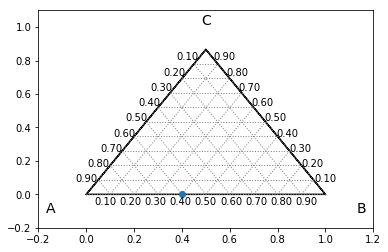

In [22]:
tfig = tern_figure(scale=1)
tfig.draw_axes(color='black')
tfig.gridlines(gridspace=0.1,color='gray',ls=':',linewidth=1)
points=np.array([[0.3,0.2,0]])
tfig.plot(points,marker='o')
tfig.label_all_corners(['A','B','C'],offset=0.2,size=14,ha='center',va='center')
#tfig.ax.axis('off')
tfig.ax.set_xlim(-0.2,1.2)
tfig.ax.set_ylim(-0.2,1.1)
tfig.axis_ticks(axis='bottom',multiple=0.1,decimal=2)
tfig.axis_ticks(axis='right',multiple=0.1,decimal=2)
tfig.axis_ticks(axis='left',multiple=0.1,decimal=2)


In [414]:
x1 = np.arange(0,1,0.2)
x2 = 1 - x1
pts = np.column_stack([x1,x2,np.zeros(len(x1))])
tp = np.copy(pts)
tp[:,0] = tp[:,0]+0.05
pts,tp

(array([[0. , 1. , 0. ],
        [0.2, 0.8, 0. ],
        [0.4, 0.6, 0. ],
        [0.6, 0.4, 0. ],
        [0.8, 0.2, 0. ]]), array([[0.05, 1.  , 0.  ],
        [0.25, 0.8 , 0.  ],
        [0.45, 0.6 , 0.  ],
        [0.65, 0.4 , 0.  ],
        [0.85, 0.2 , 0.  ]]))

In [326]:

points = np.array([[0,0,1.1],[0,0.5,0.5]])
xa = points[:,0]
xb = points[:,1]
xc = points[:,2]
u = 2*xa + xb - 1
v = 2*xb + xa - 1
    
c_only = np.argwhere((points[:,0]==0) & (points[:,1]==0))
for i in c_only:
    u[i] = -(3/2)*xc[i] + 1/2
    v[i] = -(3/2)*xc[i] + 1/2
    
u,v



(array([-1.15, -0.5 ]), array([-1.15,  0.  ]))

In [398]:
x = 0.222
dec = 0.1
print('{:.>{dec}f}'.format(x,dec=dec))

0.2
